In [96]:
#pip install pandas
#pip install numpy
#pip install scikit-learn
#pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
# imports
import pandas as pd
import numpy as np

In [3]:
# data
adult = pd.read_csv("/Users/emmafoessing/Documents/Master/MA/Code/adult.csv")
cps = pd.read_csv("/Users/emmafoessing/Documents/Master/MA/Code/cpspop.csv")

# Adult

In [99]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [100]:
# describtive statistics
summary_adult = adult.describe()

# Display the summary
print(summary_adult)

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [101]:
len(adult)

32561

In [102]:
adult.replace("?", pd.NA, inplace=True)
missing_values = adult.isnull().any().any()
missing_columns = adult.isnull().any()
missing_count = adult.isnull().sum()

print(f"missing_values: {missing_values}")
print(f"missing_columns: \n {missing_columns}")
print(f"missing_count: \n {missing_count}")

missing_values: True
missing_columns: 
 age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool
missing_count: 
 age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


The "?"s did not have an effect on the describtive statistics. These do not include missing values anyways.

In [103]:
# describtive statistics
summary_adult_with_nas = adult.describe()

# Display the summary
print(summary_adult_with_nas)
print(summary_adult)
summary_adult_with_nas == summary_adult

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
                age        fnlwgt  education.num  capital.gain 

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,True,True,True,True,True,True
mean,True,True,True,True,True,True
std,True,True,True,True,True,True
min,True,True,True,True,True,True
25%,True,True,True,True,True,True
50%,True,True,True,True,True,True
75%,True,True,True,True,True,True
max,True,True,True,True,True,True


In [104]:
# delete missings
adult_cleaned = adult.dropna()

# Number of observations and loss of observations due to deletion of missings
print(f"Lenght of dataframe without missing values: {len(adult_cleaned)}")
print(f"Number of lost observations due to deletion of missing values: {len(adult)-len(adult_cleaned)}")

# Display the cleaned DataFrame
adult_cleaned.head()

Lenght of dataframe without missing values: 30162
Number of lost observations due to deletion of missing values: 2399


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


Either the describe() function does not include observations with any missings in any column or the dataset is really robust and the descriptive statistics are not changed by the deletion of missing values.

In [105]:
# see if the describtive statistics changed drastically
print(f"Describtive statistics with missings: \n {summary}")

summary_adult_cleaned = adult.describe()
print(f"Describtive statistics without missings: \n {summary_adult_cleaned}")

summary == summary_adult_cleaned

Describtive statistics with missings: 
                 age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
Describtive statistics 

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,True,True,True,True,True,True
mean,True,True,True,True,True,True
std,True,True,True,True,True,True
min,True,True,True,True,True,True
25%,True,True,True,True,True,True
50%,True,True,True,True,True,True
75%,True,True,True,True,True,True
max,True,True,True,True,True,True


In [106]:
# delete rows with missings
adult = adult_cleaned
# replace the column names containing "."s
new_column_names = {col: col.replace(".", "_") for col in adult.columns}
adult.rename(columns=new_column_names, inplace=True)

code from https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch adjusted:

In [107]:
from sklearn.preprocessing import LabelEncoder
# Define categorial columns with strings to be transfered to numeric values
categorical = ['workclass','education', 'marital_status', 'occupation', 'relationship',
               'race', 'sex','native_country']

# Set the LabelEncoder
label_encoder = LabelEncoder()
# Create a dictionary to store mappings of labels
label_mappings = {}

# Iterate through each categorical column
for col in categorical:
    # Fit LabelEncoder and transform labels
    label_encoder.fit(adult[col])
    adult[col] = label_encoder.transform(adult[col])
    # Store the mapping of labels in the dictionary
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


In [108]:
label_mappings

{'workclass': {'Federal-gov': 0,
  'Local-gov': 1,
  'Private': 2,
  'Self-emp-inc': 3,
  'Self-emp-not-inc': 4,
  'State-gov': 5,
  'Without-pay': 6},
 'education': {'10th': 0,
  '11th': 1,
  '12th': 2,
  '1st-4th': 3,
  '5th-6th': 4,
  '7th-8th': 5,
  '9th': 6,
  'Assoc-acdm': 7,
  'Assoc-voc': 8,
  'Bachelors': 9,
  'Doctorate': 10,
  'HS-grad': 11,
  'Masters': 12,
  'Preschool': 13,
  'Prof-school': 14,
  'Some-college': 15},
 'marital_status': {'Divorced': 0,
  'Married-AF-spouse': 1,
  'Married-civ-spouse': 2,
  'Married-spouse-absent': 3,
  'Never-married': 4,
  'Separated': 5,
  'Widowed': 6},
 'occupation': {'Adm-clerical': 0,
  'Armed-Forces': 1,
  'Craft-repair': 2,
  'Exec-managerial': 3,
  'Farming-fishing': 4,
  'Handlers-cleaners': 5,
  'Machine-op-inspct': 6,
  'Other-service': 7,
  'Priv-house-serv': 8,
  'Prof-specialty': 9,
  'Protective-serv': 10,
  'Sales': 11,
  'Tech-support': 12,
  'Transport-moving': 13},
 'relationship': {'Husband': 0,
  'Not-in-family': 1,
 

In [109]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  int64 
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  int64 
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  int64 
 6   occupation      30162 non-null  int64 
 7   relationship    30162 non-null  int64 
 8   race            30162 non-null  int64 
 9   sex             30162 non-null  int64 
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  int64 
 14  income          30162 non-null  object
dtypes: int64(14), object(1)
memory usage: 3.7+ MB


In [110]:
adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0
workclass,30162.0,2.199324,0.953925,0.0,2.00,2.0,2.0,6.0
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education,30162.0,10.333764,3.812292,0.0,9.00,11.0,12.0,15.0
education_num,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0
marital_status,30162.0,2.580134,1.498016,0.0,2.00,2.0,4.0,6.0
occupation,30162.0,5.959850,4.029566,0.0,2.00,6.0,9.0,13.0
relationship,30162.0,1.418341,1.601338,0.0,0.00,1.0,3.0,5.0
race,30162.0,3.678602,0.834709,0.0,4.00,4.0,4.0,4.0
sex,30162.0,0.675685,0.468126,0.0,0.00,1.0,1.0,1.0


Since the data already contained a numeric encoding of the education, this column can be dropped as it is equivalent (not exaclty numerically but in the sense that each number represents one level of education and those are the same) to the numerized encodings of the education.

In [114]:
adult = adult.drop('education_num', axis=1)

In [115]:
adult.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,2,132870,11,6,3,1,4,0,0,4356,18,38,<=50K
3,54,2,140359,5,0,6,4,4,0,0,3900,40,38,<=50K
4,41,2,264663,15,5,9,3,4,0,0,3900,40,38,<=50K
5,34,2,216864,11,0,7,4,4,0,0,3770,45,38,<=50K
6,38,2,150601,0,5,0,4,4,1,0,3770,40,38,<=50K


In [116]:
# save the data
adult.to_csv("/Users/emmafoessing/Documents/Master/MA/Code/adult_preprocessed.csv", index = False)

# CPS

In [17]:
# adult
sum_less50k = sum(adult.income=="<=50K")/len(adult)
sum_more50k = sum(adult.income==">50K")/len(adult)
print(f"portion with less then 50K: {sum_less50k}")
print(f"portion with more then 50K: {sum_more50k}")

portion with less then 50K: 0.7591904425539756
portion with more then 50K: 0.2408095574460244


In [20]:
# cps
print(f"portion with less then 50K: {sum(cps.income <= 50000)/len(cps)}")
print(f"portion with more then 50K: {sum(cps.income > 50000)/len(cps)}")
#--> would have equal proportions as adult for 70K

portion with less then 50K: 0.5920584189659358
portion with more then 50K: 0.40794158103406425


# CART Implementation (example)

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
 
# Divide the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
#Create a CART template
tree_classifier = DecisionTreeClassifier(random_state=42)
 
#Train the model on the training data
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Model accuracy: 1.0


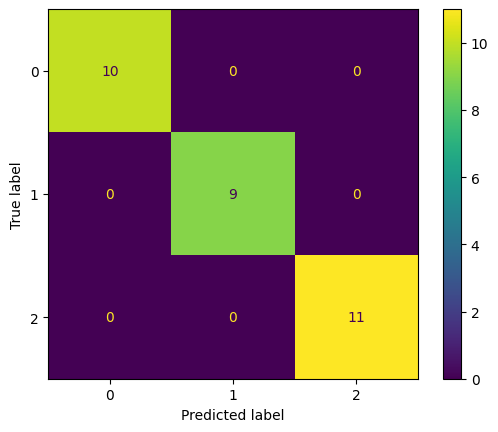

In [95]:
#Make predictions on test data
y_pred = tree_classifier.predict(X_test)
 
#Calculate the accuracy of the model<code>
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

#View the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=tree_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_classifier.classes_)
disp.plot()